###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [76]:
import os
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [77]:
# [ALTERE AQUI]

non_verbal = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv')


###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável. 

Dica: Use a função `replace`.

In [78]:
# [ALTERE AQUI]
num_linhas = 15 
non_verbal.head(num_linhas)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,?,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,1,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,4,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,likes,indiferent,1,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [79]:
non_verbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [80]:
index_names = non_verbal[non_verbal["Type of Client"]== 2].index
index_names.shape

(36,)

In [81]:
non_verbal.drop(index_names[:26], inplace = True)
print(non_verbal[non_verbal["Type of Client"]==0].shape[0], non_verbal[non_verbal['Type of Client']==1].shape[0],non_verbal[non_verbal['Type of Client']==2].shape[0],non_verbal[non_verbal['Type of Client']==3].shape[0],non_verbal[non_verbal['Type of Client']==4].shape[0],non_verbal[non_verbal['Type of Client']==5].shape[0])

5 4 10 10 14 4


In [82]:
 non_verbal.columns


Index(['sex', 'age', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3',
       'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Tense - relaxed',
       'Authoritative -anarchic ', 'Hostile - friendly', 'TAudio1', 'TAudio2',
       'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics',
       'Type of Client'],
      dtype='object')

A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.
 
Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [101]:
categoricos = ['sex', 'age', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3','PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Tense - relaxed','Authoritative -anarchic ', 'Hostile - friendly', 'TAudio1', 'TAudio2','TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics','Type of Client']
for categorico in categoricos:
  non_verbal[categorico]=preprocessing.LabelEncoder().fit_transform(non_verbal[categorico])
non_verbal.head()


,sex,age,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Type of Client,country,Proxemics
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Justifique a remoção de colunas caso ocoram.

In [84]:
# [ALTERE AQUI]
non_verbal = non_verbal.drop(columns=['country','Proxemics'])

Faça as demais transformações que julgar necessárias na base de dados.

In [85]:
# [ALTERE AQUI]


###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [86]:
# [ALTERE AQUI]
x = non_verbal.drop(['Type of Client'], axis=1)
y = non_verbal['Type of Client']


Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [98]:

# [ALTERE AQUI]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [88]:
scaler = StandardScaler()
scaler.fit(X_train['age'].values.reshape(-1,1))
X_train['age']= scaler.transform(X_train['age'].values.reshape(-1,1))
X_test['age']= scaler.transform(X_test['age'].values.reshape(-1,1))
X_train.head()

,sex,age,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3
55,1,-1.024528,0,0,0,1,1,0,0,0,1,4,9,1,2,0,2,2,0,0
69,1,-0.560340,0,0,0,1,1,0,0,1,1,4,2,4,2,0,0,0,0,0
2,0,-1.604762,0,1,1,2,1,0,1,2,1,4,1,4,2,0,0,2,0,0
71,1,-0.444294,0,0,0,0,1,0,0,0,1,4,4,3,2,0,0,1,0,0
52,1,0.716175,1,2,1,2,1,0,2,2,1,0,0,0,1,0,0,2,0,0


###KNN

Instancie e treine a KNN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [89]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [91]:
import numpy as np

score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  score.append(knn.score(X_test, y_test))

Plote as métricas em um gráfico.

Text(0, 0.5, 'Score')

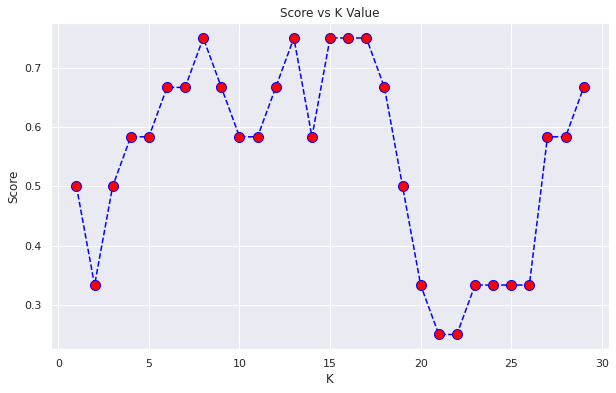

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score vs K Value')
plt.xlabel('K')
plt.ylabel('Score')

In [95]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6666666666666666

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         3
           3       0.40      0.67      0.50         3
           4       0.67      0.40      0.50         5

    accuracy                           0.58        12
   macro avg       0.45      0.52      0.46        12
weighted avg       0.57      0.58      0.55        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plote a matriz de confusão.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


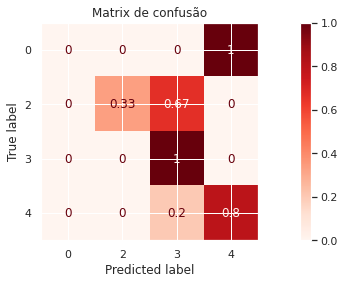

In [93]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
# [ALTERE AQUI]
matrix = plot_confusion_matrix(knn, X_test, y_test,
                               cmap=plt.cm.Reds,
                               normalize='true')
plt.title('Matrix de confusão')
plt.show(matrix)